# FLOOD PREDICTION

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('kerala.csv')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [363]:
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
RAINFALL       0
FLOODS         0
dtype: int64

# Replace Yes & No by 1 & 0 

In [364]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


# Lebel Encoding

In [365]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data.iloc[:,0]=lb.fit_transform(data.iloc[:,1])

In [366]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,RAINFALL,FLOODS
0,0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [367]:
x = data.iloc[:,:15]
x.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,RAINFALL
0,0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6
1,1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6
2,2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2
3,3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7
4,4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6


In [368]:
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [369]:
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

In [370]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [371]:
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
109,2010,18.6,1.0,31.4,138.9,190.6,667.5,629.0,356.0,275.6,441.4,335.1,46.8
13,1914,0.7,6.8,18.1,32.7,164.2,565.3,857.7,402.2,241.0,374.4,100.9,135.2
63,1964,1.1,7.8,67.2,83.3,94.8,379.4,754.2,548.0,398.2,325.7,191.7,17.8
71,1972,2.6,7.5,2.5,87.5,436.0,401.8,714.4,294.9,185.7,351.5,140.5,114.3
26,1927,18.8,35.3,49.6,86.5,265.4,720.2,888.2,315.0,335.6,135.8,137.6,6.8


In [372]:
y_train.head()

109    1
13     0
63     0
71     0
26     1
Name: FLOODS, dtype: int64

In [373]:
data['YEAR'].unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [374]:
data['FLOODS'].unique()

array([1, 0], dtype=int64)

# Flood Table

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLOODS', ylabel='count'>

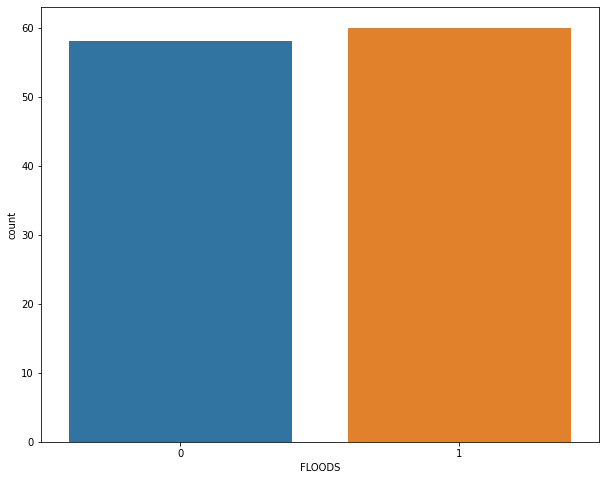

In [375]:
plt.figure(figsize=(10,8))
sns.countplot(data['FLOODS'])

# Rainfall in every Year

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Rainfall vs Year'}, xlabel='RAINFALL', ylabel='count'>

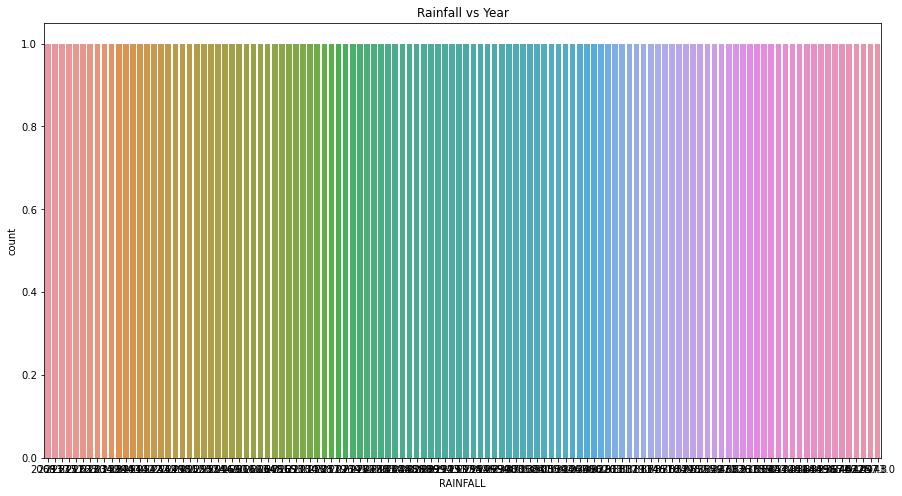

In [344]:
plt.figure(figsize=(15,8))
plt.title("Rainfall vs Year")
sns.countplot(data['RAINFALL'])

In [345]:
data['RAINFALL'].unique()

array([3248.6, 3326.6, 3271.2, 3129.7, 2741.6, 2708. , 3671.1, 2648.3,
       3050.2, 2848.6, 2726.7, 3451.3, 2610.8, 2899.1, 3024.5, 2945.3,
       2704.8, 2501.9, 3003.3, 3303.1, 2719.9, 3267.6, 3484.7, 4226.4,
       3062.1, 2965.4, 2994.7, 2502.8, 3361.6, 3018. , 3259.6, 3403. ,
       4072.9, 2410.7, 2498.2, 3043.3, 2818.2, 2634.1, 2937.5, 3117.8,
       3111.1, 3050.9, 3464.2, 2490. , 2432.4, 3565.5, 2998.1, 3039.2,
       2942.6, 3146.6, 2705.5, 2334.8, 2544.9, 2938. , 3134.7, 2798.4,
       3103.3, 2923.1, 3746. , 3385.5, 4257.8, 3375.8, 2651.1, 2869.1,
       2342.4, 2621.7, 2569.1, 3392.7, 2665. , 2703.5, 3076.8, 2739.4,
       2412.5, 2767.4, 3498.4, 2068.8, 3047.6, 3176.7, 2503. , 2803.4,
       3005.9, 2223.3, 2320.3, 2762.1, 2390.5, 2093.2, 2137.6, 2403.5,
       2422.7, 2693.1, 3184.5, 3239.5, 2717.7, 3410.8, 2858.8, 2610. ,
       3252.4, 3151.5, 2914.6, 2412.6, 2931.1, 2507.4, 2394.9, 2886.1,
       3031.1, 3420.6, 3489.6, 2524.5, 2810.6, 3131.8, 3035.1, 2151.1,
      

# Flood Count

In [346]:
data['FLOODS'].value_counts()

1    60
0    58
Name: FLOODS, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'JAN vs YEAR')

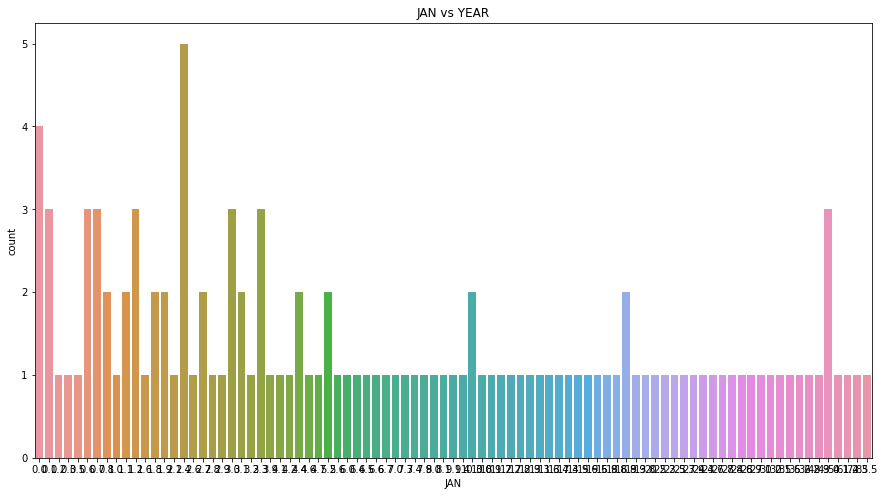

In [347]:
plt.figure(figsize=(15,8))
sns.countplot(data['JAN'])
plt.title("JAN vs YEAR")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' FEB vs Year')

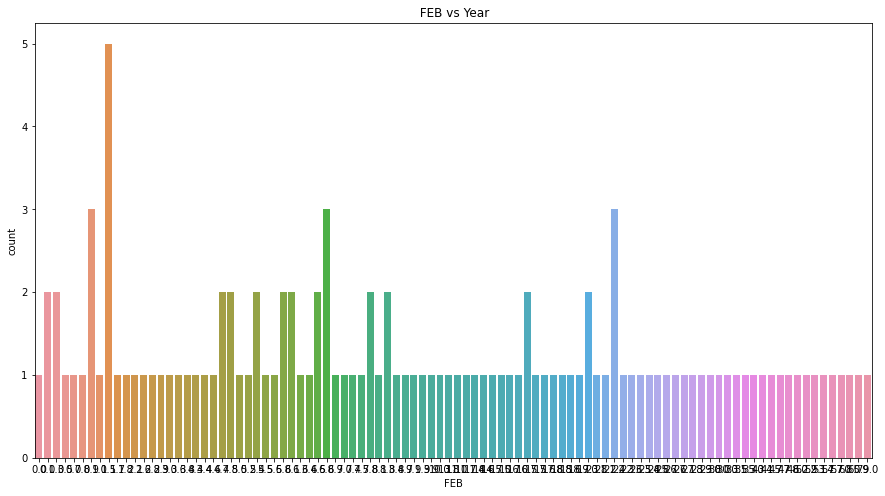

In [348]:
plt.figure(figsize=(15,8))
sns.countplot(data['FEB'])
plt.title(" FEB vs Year")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'MAR vs Year')

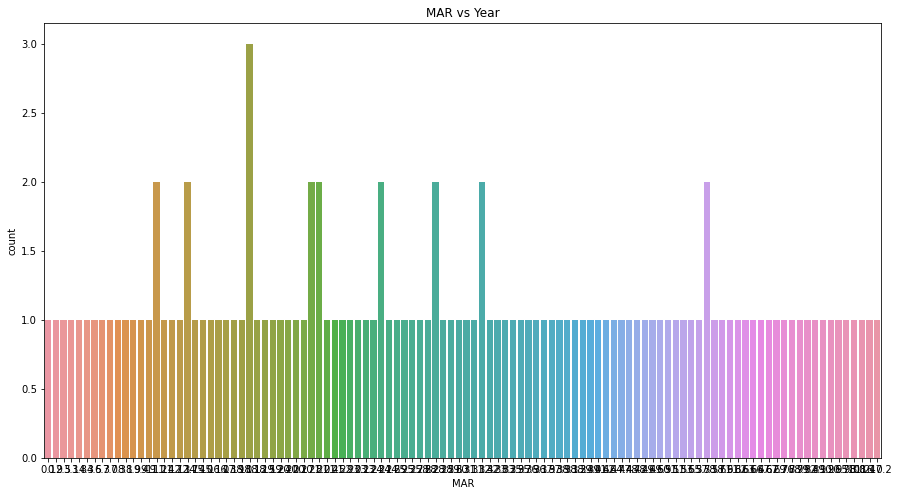

In [349]:
plt.figure(figsize=(15,8))
sns.countplot(data['MAR'])
plt.title("MAR vs Year")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'APR vs Year')

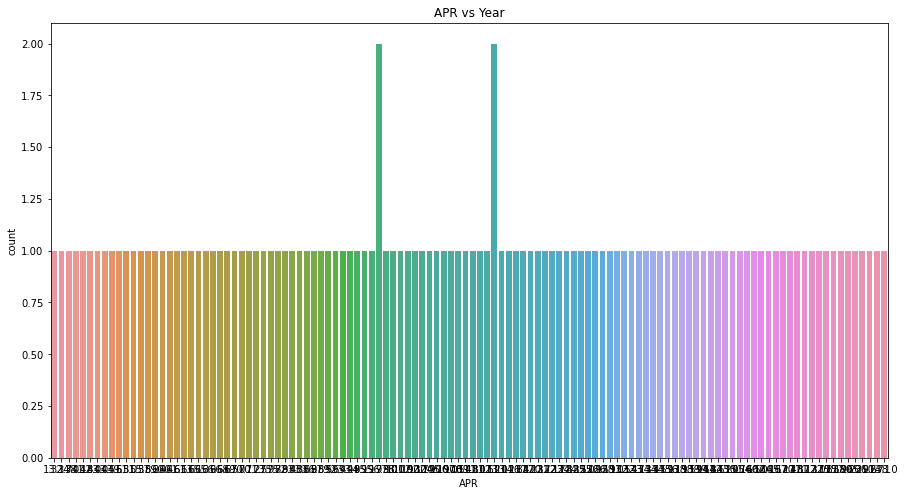

In [350]:
plt.figure(figsize=(15,8))
sns.countplot(data['APR'])
plt.title("APR vs Year")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'MAY vs Year')

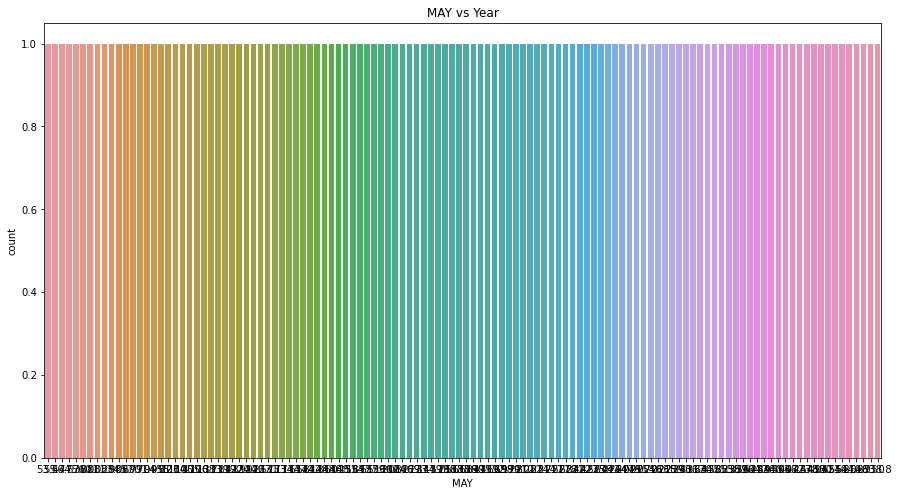

In [351]:
plt.figure(figsize=(15,8))
sns.countplot(data['MAY'])
plt.title("MAY vs Year")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'JUN vs Year')

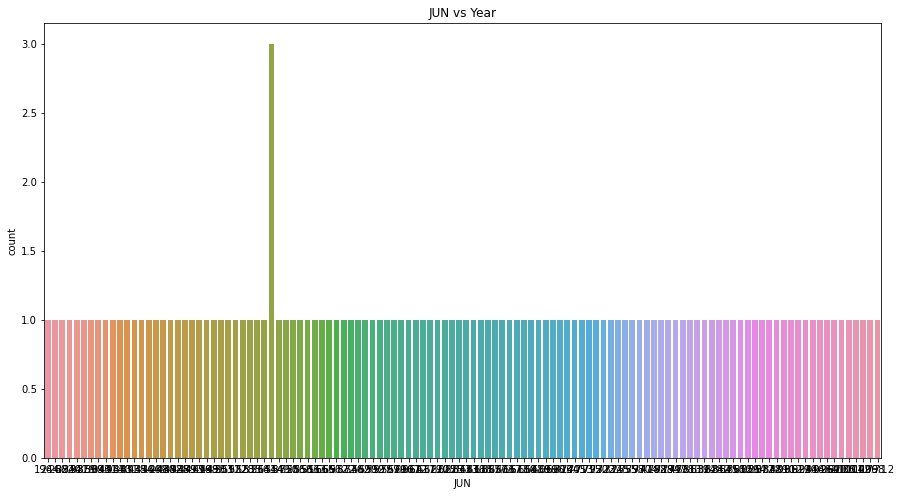

In [352]:
plt.figure(figsize=(15,8))
sns.countplot(data['JUN'])
plt.title("JUN vs Year")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'JUL vs Year')

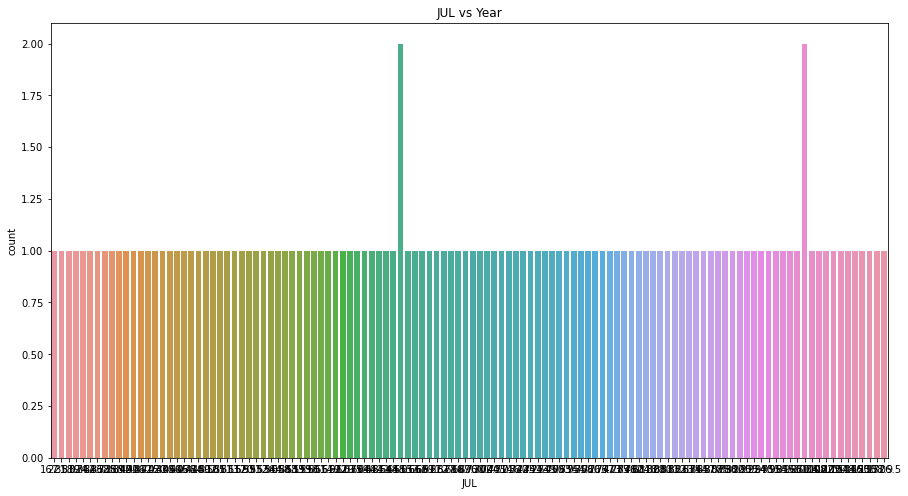

In [353]:
plt.figure(figsize=(15,8))
sns.countplot(data['JUL'])
plt.title("JUL vs Year")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'AUG vs Year')

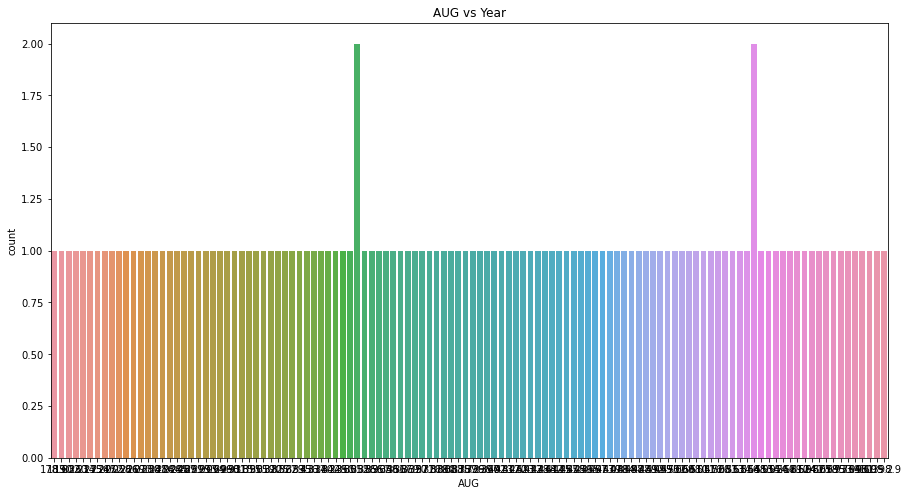

In [354]:
plt.figure(figsize=(15,8))
sns.countplot(data['AUG'])
plt.title("AUG vs Year")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'SEP vs Year')

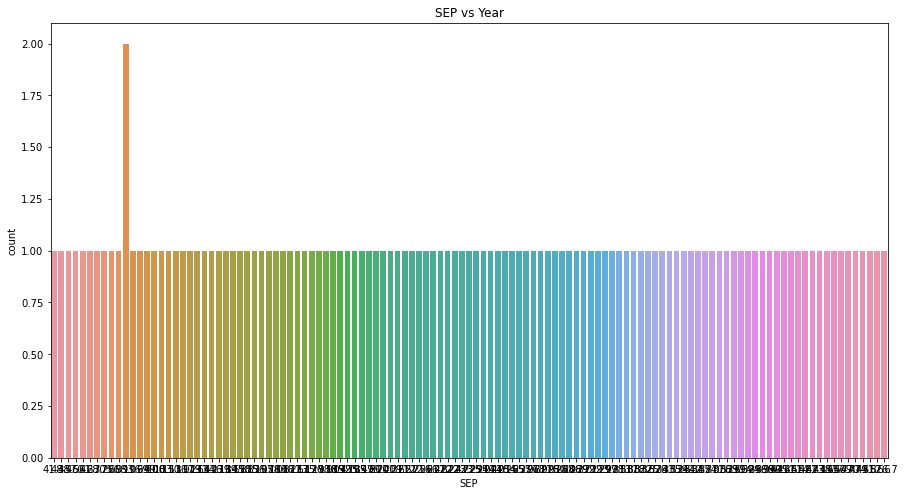

In [355]:
plt.figure(figsize=(15,8))
sns.countplot(data['SEP'])
plt.title("SEP vs Year")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'OCT vs Year')

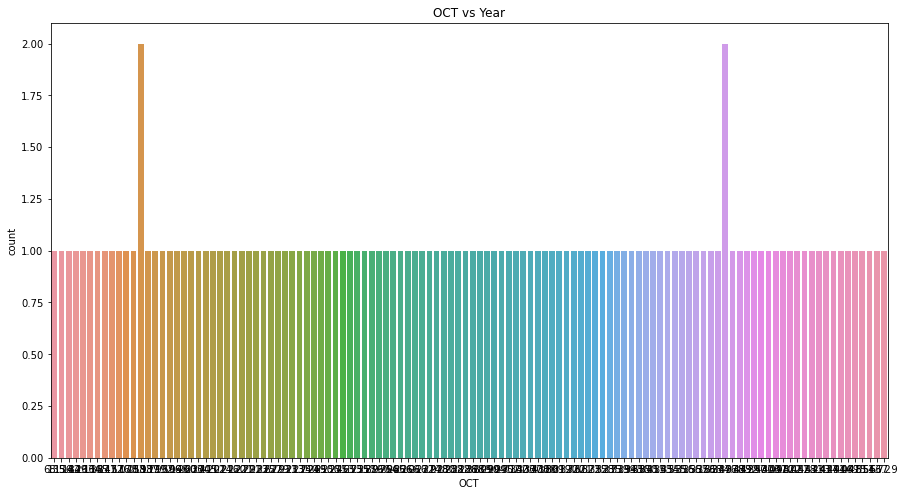

In [356]:
plt.figure(figsize=(15,8))
sns.countplot(data['OCT'])
plt.title("OCT vs Year")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'NOV vs Year')

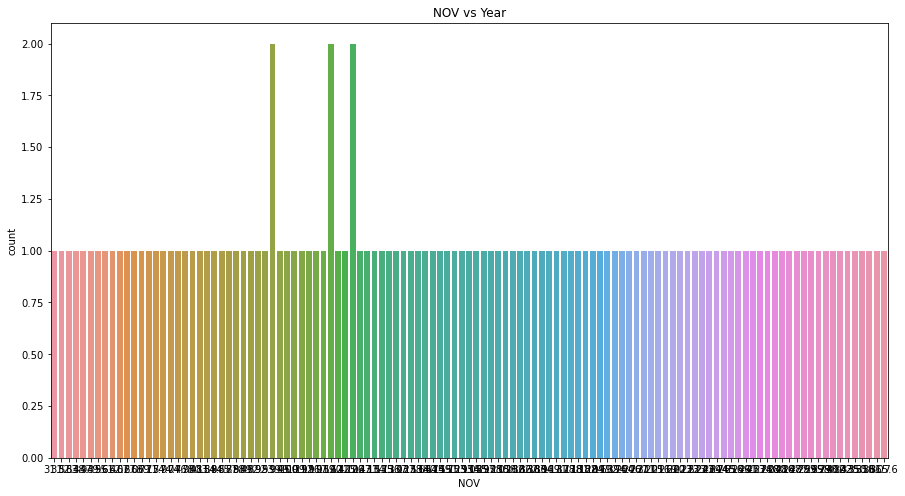

In [357]:
plt.figure(figsize=(15,8))
sns.countplot(data['NOV'])
plt.title("NOV vs Year")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'DEC vs Year')

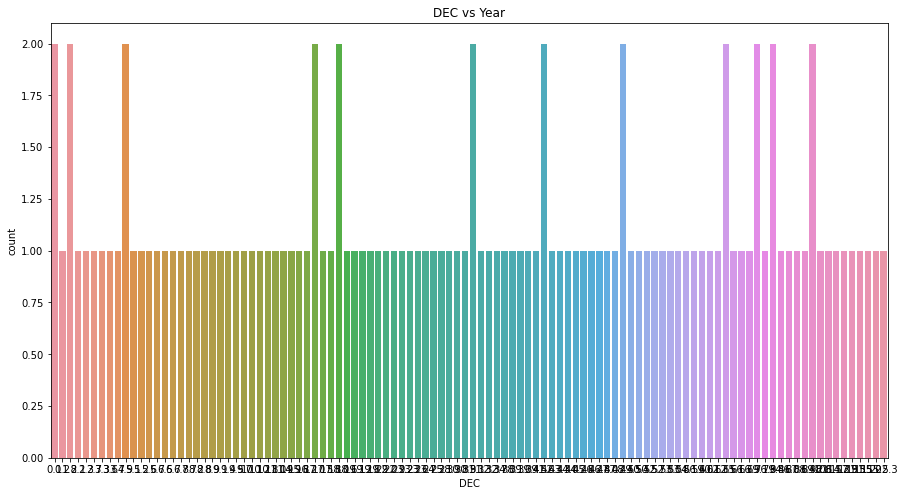

In [358]:
plt.figure(figsize=(15,8))
sns.countplot(data['DEC'])
plt.title("DEC vs Year")

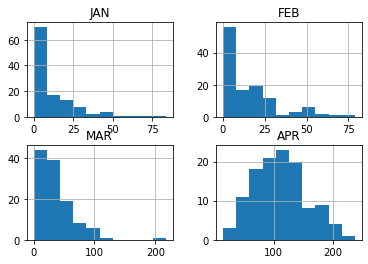

In [359]:
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JAN','FEB','MAR','APR']]
c.hist()
plt.show()

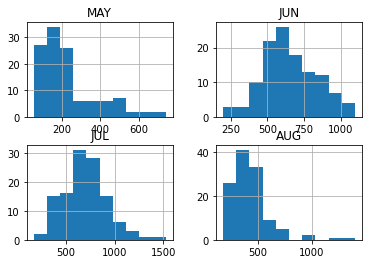

In [360]:
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['MAY','JUN','JUL','AUG']]
c.hist()
plt.show()

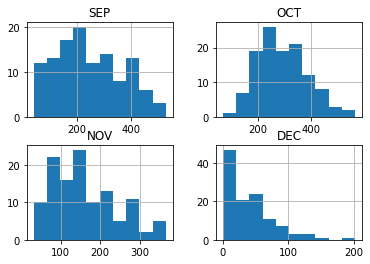

In [361]:
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['SEP','OCT','NOV','DEC']]
c.hist()
plt.show()

In [232]:
data['JAN'].value_counts()

2.4     5
0.0     4
0.6     3
1.2     3
0.1     3
43.0    3
3.3     3
3.0     3
0.7     3
3.1     2
4.4     2
1.8     2
0.8     2
2.7     2
5.2     2
18.8    2
10.3    2
1.1     2
1.9     2
7.0     1
61.2    1
36.8    1
0.2     1
28.7    1
1.6     1
2.6     1
5.6     1
12.9    1
7.3     1
14.3    1
9.1     1
31.6    1
24.3    1
14.9    1
10.9    1
4.6     1
3.9     1
7.4     1
20.5    1
18.6    1
0.5     1
8.1     1
19.8    1
4.7     1
16.5    1
11.7    1
6.0     1
2.1     1
2.8     1
28.4    1
30.2    1
22.2    1
13.7    1
42.9    1
28.6    1
4.1     1
19.3    1
24.7    1
30.5    1
35.2    1
2.9     1
12.8    1
16.9    1
54.1    1
8.0     1
26.7    1
23.7    1
3.2     1
12.7    1
10.8    1
9.4     1
6.4     1
7.9     1
4.2     1
23.5    1
13.1    1
6.6     1
6.7     1
83.5    1
1.0     1
15.9    1
13.6    1
0.3     1
6.5     1
23.9    1
74.5    1
29.1    1
Name: JAN, dtype: int64

In [231]:
data['DEC'].value_counts()

48.4     2
17.0     2
62.5     2
31.1     2
1.8      2
18.0     2
4.9      2
69.1     2
79.4     2
41.6     2
89.2     2
0.1      2
11.9     1
5.7      1
39.0     1
6.7      1
30.8     1
19.9     1
3.6      1
53.8     1
9.4      1
114.3    1
62.3     1
47.2     1
39.5     1
66.3     1
32.7     1
23.6     1
50.5     1
38.1     1
155.5    1
17.8     1
76.9     1
23.3     1
43.3     1
56.4     1
3.7      1
2.7      1
9.7      1
2.1      1
10.1     1
44.2     1
88.4     1
6.5      1
46.2     1
2.3      1
49.5     1
5.2      1
5.6      1
131.1    1
9.5      1
23.7     1
44.0     1
46.8     1
10.8     1
17.5     1
9.1      1
34.0     1
52.7     1
16.2     1
98.8     1
50.4     1
25.1     1
15.8     1
8.2      1
53.0     1
54.1     1
8.9      1
14.9     1
135.2    1
45.8     1
22.0     1
87.6     1
32.3     1
11.0     1
52.8     1
86.0     1
0.2      1
3.3      1
59.0     1
6.8      1
39.4     1
7.7      1
106.5    1
28.9     1
121.5    1
19.8     1
5.1      1
66.9     1
23.2     1
8.8      1

# Data Info

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  118 non-null    int64  
 1   YEAR         118 non-null    int64  
 2   JAN          118 non-null    float64
 3   FEB          118 non-null    float64
 4   MAR          118 non-null    float64
 5   APR          118 non-null    float64
 6   MAY          118 non-null    float64
 7   JUN          118 non-null    float64
 8   JUL          118 non-null    float64
 9   AUG          118 non-null    float64
 10  SEP          118 non-null    float64
 11  OCT          118 non-null    float64
 12  NOV          118 non-null    float64
 13  DEC          118 non-null    float64
 14  RAINFALL     118 non-null    float64
 15  FLOODS       118 non-null    int64  
dtypes: float64(13), int64(3)
memory usage: 14.9 KB


In [234]:
data.describe()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,RAINFALL,FLOODS
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,58.500000,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085,0.508475
std,34.207699,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407,0.502060
min,0.000000,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000,0.000000
25%,29.250000,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000,0.000000
50%,58.500000,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000,1.000000
75%,87.750000,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000,1.000000
max,117.000000,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000,1.000000


# Mean finding

In [88]:
data['RAINFALL'].mean()

2925.405084745761

# Median finding

In [235]:
data['RAINFALL'].median()

2934.3

# Std finding

In [239]:
data['RAINFALL'].std()

452.16940680740095

# Statistics

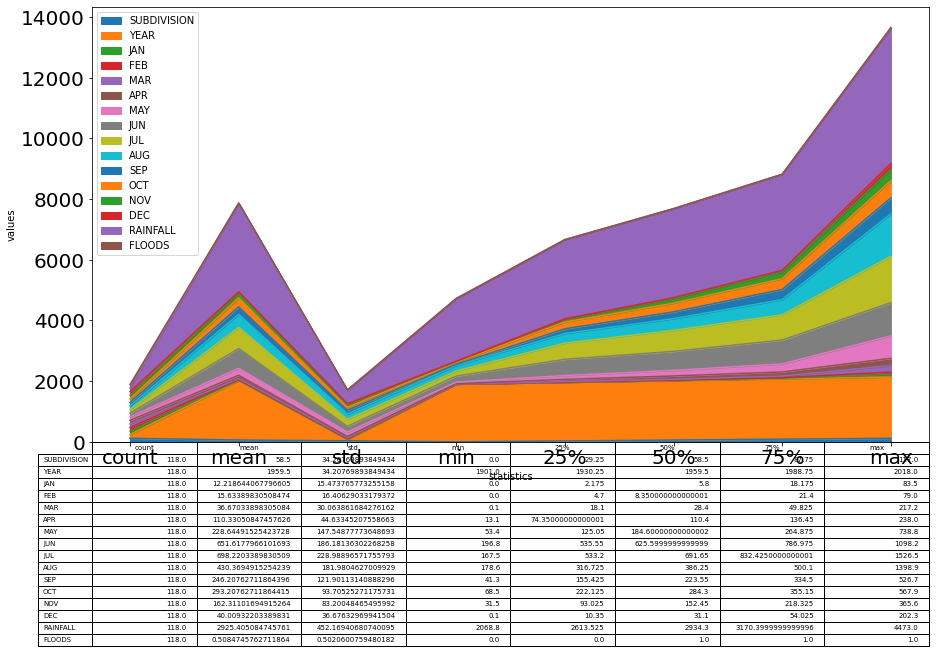

In [240]:
data.describe().plot(kind='area',fontsize=20,figsize=(15,8),table=True)
plt.xlabel('statistics')
plt.ylabel('values')
plt.show()

# Pie charts

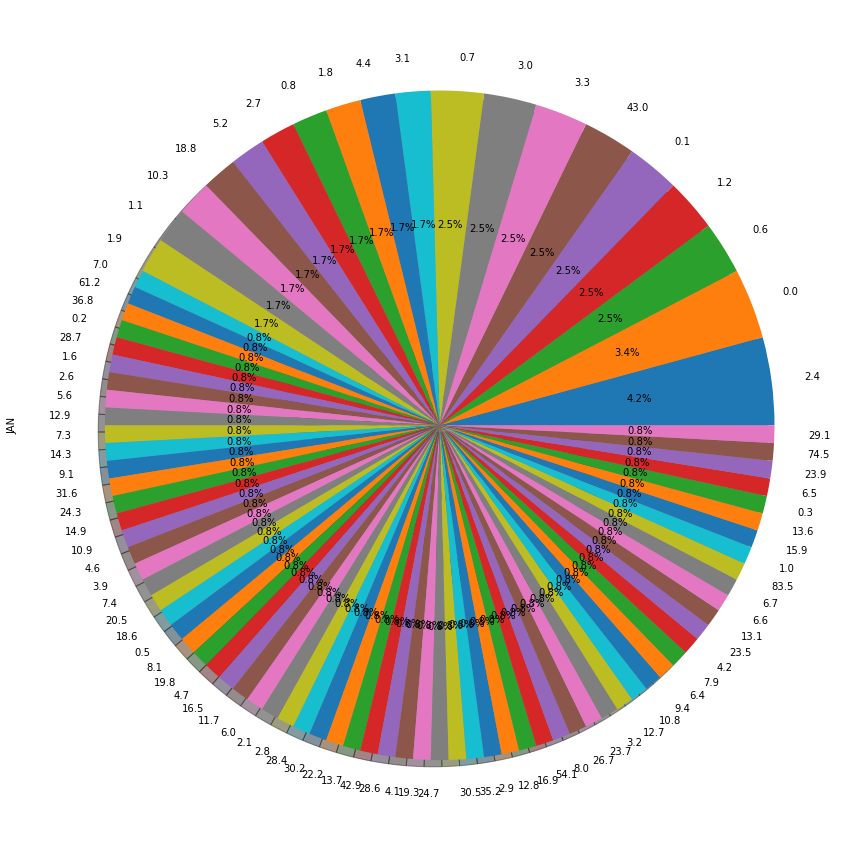

In [254]:
plt.figure(figsize=(15,20))
data['JAN'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

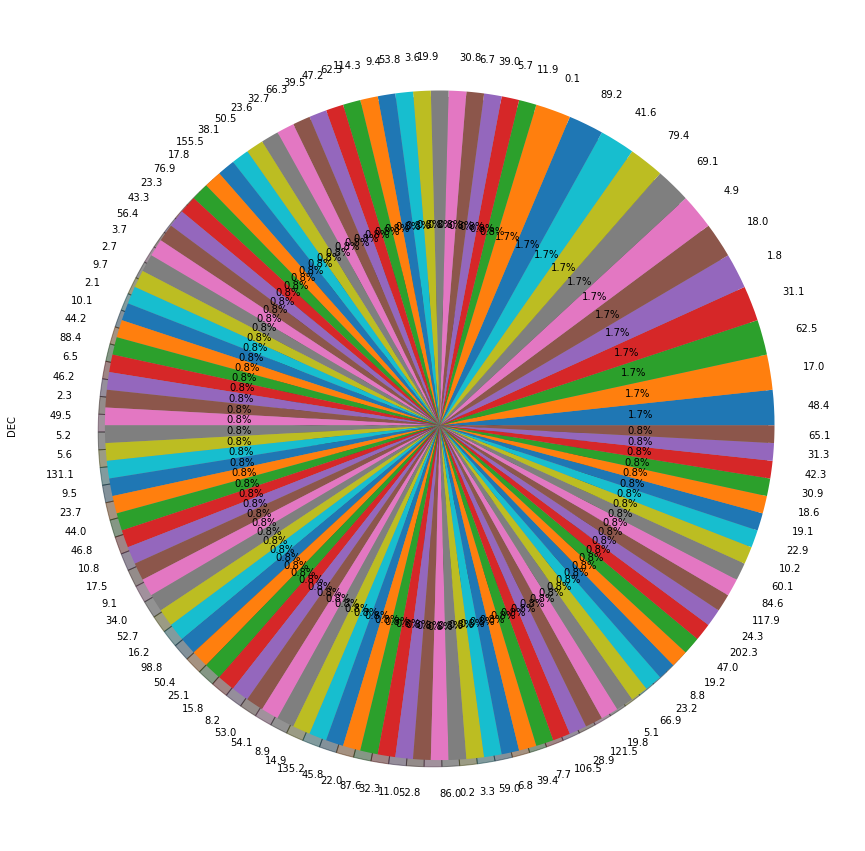

In [255]:
plt.figure(figsize=(15,20))
data['DEC'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

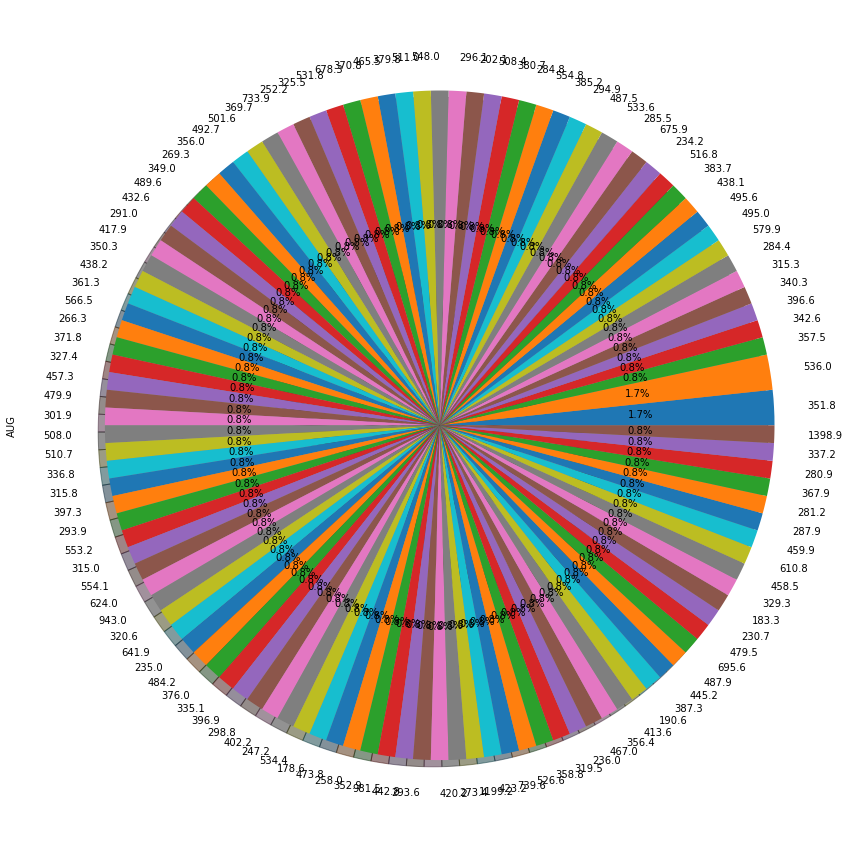

In [261]:
plt.figure(figsize=(15,20))
data['AUG'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

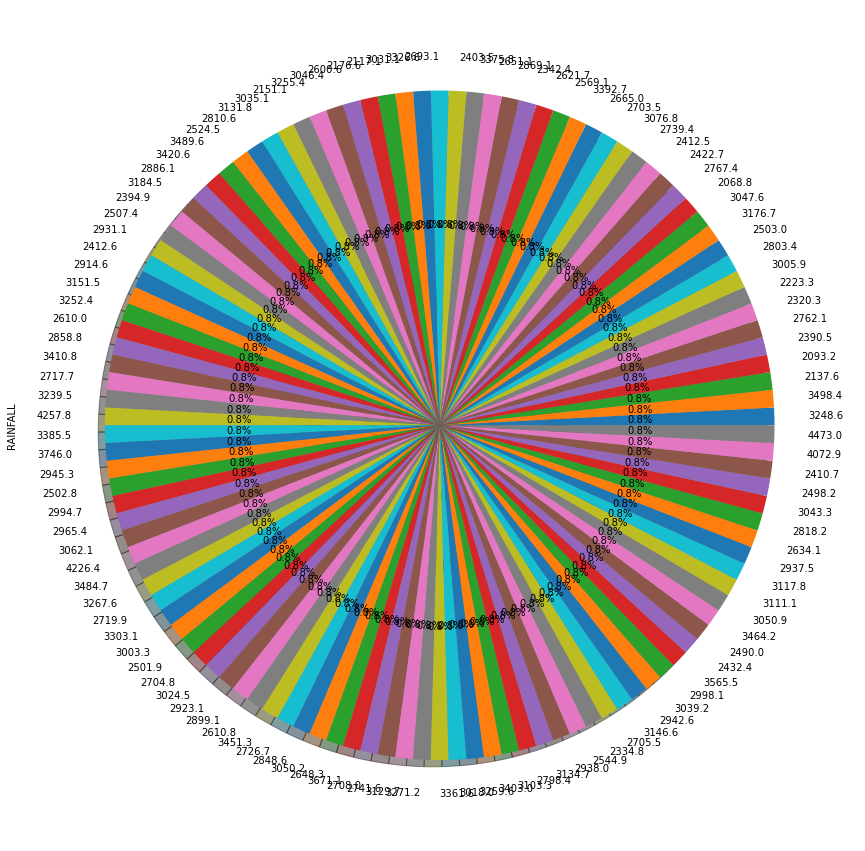

In [262]:
plt.figure(figsize=(15,20))
data['RAINFALL'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

# Pie Chart of Flood Count

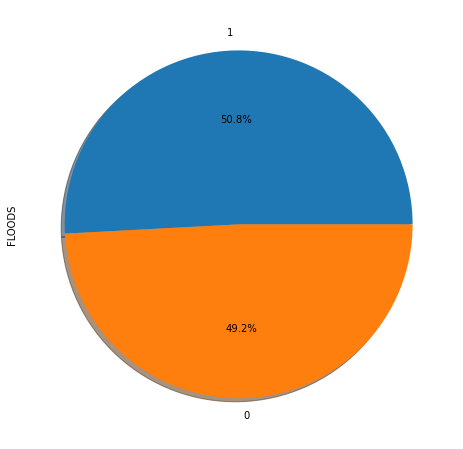

In [308]:
plt.figure(figsize=(10,8))
data['FLOODS'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

# Filter with value

In [243]:
x1=data['RAINFALL']>=2925
p=data[x1]
p.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,RAINFALL,FLOODS
0,0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
6,6,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1,1


# Year vs Rainfall

Text(0.5, 1.0, 'YEAR vs RAINFALL')

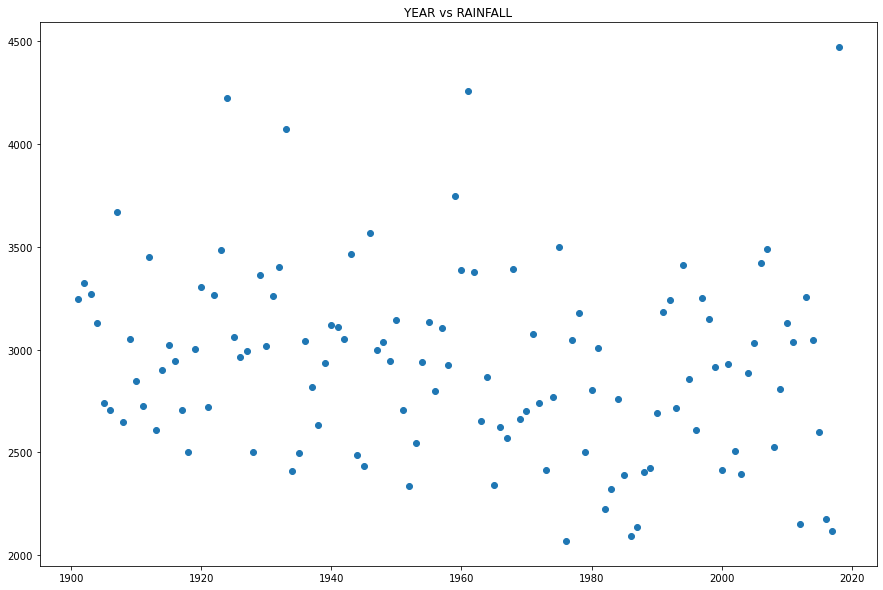

In [244]:
plt.figure(figsize=(15,10))
x=data['YEAR']
y=data['RAINFALL']
plt.scatter(x,y)
plt.title("YEAR vs RAINFALL")

# Year vs Flood

Text(0.5, 1.0, 'YEAR vs FLOODS')

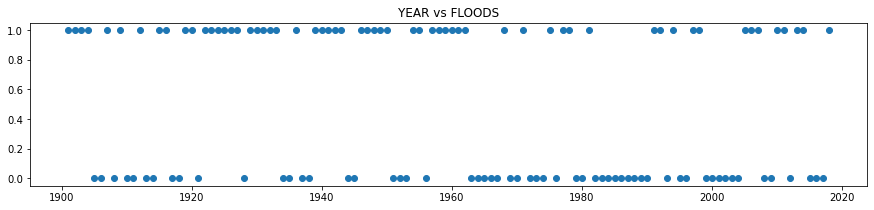

In [249]:
plt.figure(figsize=(15,3))
x=data['YEAR']
y=data['FLOODS']
plt.scatter(x,y)
plt.title("YEAR vs FLOODS")

# Floods vs Rainfall

Text(0.5, 1.0, 'FLOODS vs RAINFALL')

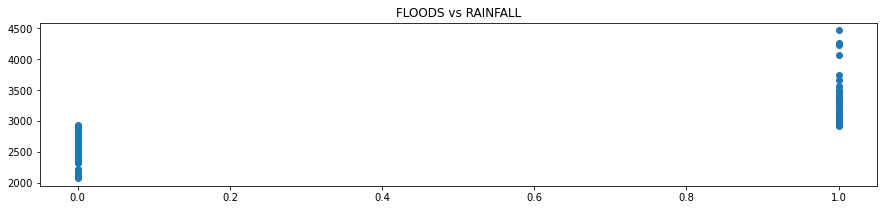

In [251]:
plt.figure(figsize=(15,3))
x=data['FLOODS']
y=data['RAINFALL']
plt.scatter(x,y)
plt.title("FLOODS vs RAINFALL")

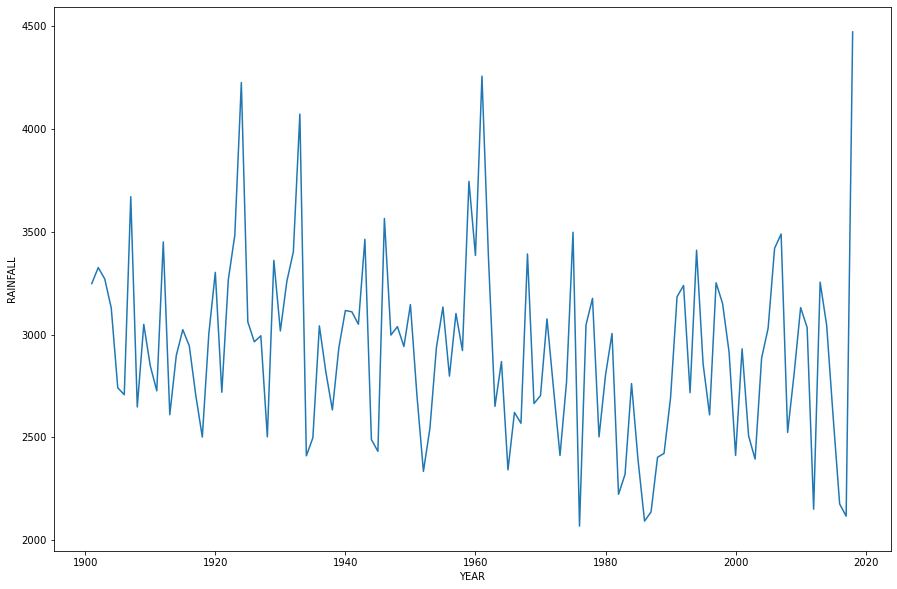

In [328]:
plt.figure(figsize=(15,10))
sns.lineplot(x='YEAR',y='RAINFALL',data=data)
plt.show()

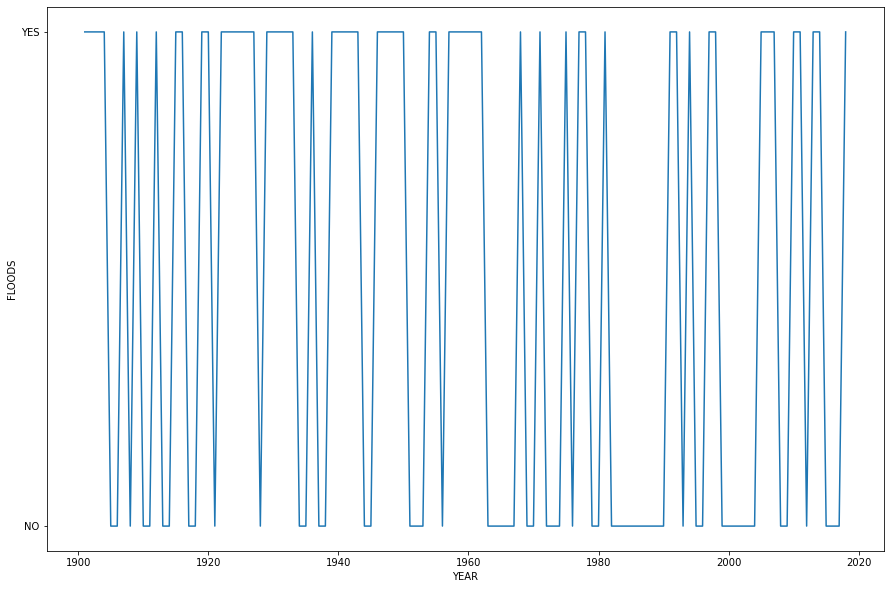

In [325]:
plt.figure(figsize=(15,10))
sns.lineplot(x='YEAR',y='FLOODS',data=data)
plt.show()

# Correlational data

In [267]:
data.corr()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,RAINFALL,FLOODS
SUBDIVISION,1.000000,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048,-0.202548
YEAR,1.000000,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048,-0.202548
JAN,-0.225531,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648,0.145313
FEB,0.003879,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457,-0.035730
MAR,-0.012842,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103,0.086739
APR,0.086865,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358,0.034392
MAY,-0.059661,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723,0.242813
JUN,-0.174938,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407,0.442531
JUL,-0.223403,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990,0.442774
AUG,0.044173,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036,0.286690


# Correlation Table

<AxesSubplot:>

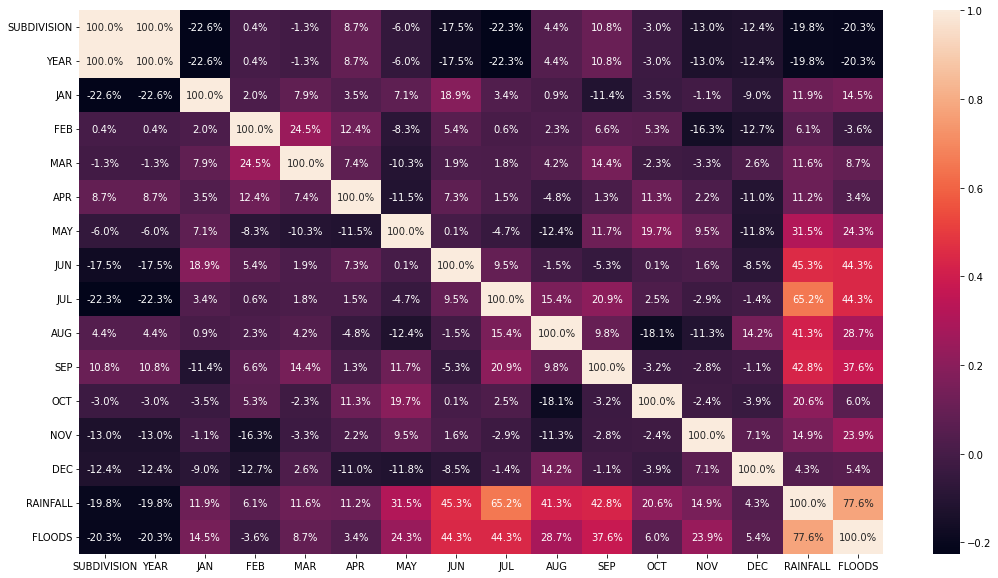

In [268]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt='.1%')

# Covarience Data

In [269]:
data.cov()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,RAINFALL,FLOODS
SUBDIVISION,1170.166667,1170.166667,-119.378632,2.176923,-13.207265,132.625641,-301.126068,-1114.149145,-1749.953846,274.983761,448.915812,-96.876496,-370.360256,-155.123504,-3063.344444,-3.478632
YEAR,1170.166667,1170.166667,-119.378632,2.176923,-13.207265,132.625641,-301.126068,-1114.149145,-1749.953846,274.983761,448.915812,-96.876496,-370.360256,-155.123504,-3063.344444,-3.478632
JAN,-119.378632,-119.378632,239.437427,4.979192,36.577053,24.039512,163.062403,545.574281,121.970900,24.434163,-214.094844,-50.812451,-14.205421,-50.968209,830.154092,1.128900
FEB,2.176923,2.176923,4.979192,269.166362,121.027766,90.585966,-202.129655,165.293580,21.748364,69.442838,132.629654,81.684355,-222.332684,-76.434079,455.913330,-0.294307
MAR,-13.207265,-13.207265,36.577053,121.027766,903.835779,99.315784,-456.721990,106.348567,126.186249,232.033874,527.184758,-64.980285,-81.573089,28.990108,1578.305793,1.309228
APR,132.625641,132.625641,24.039512,90.585966,99.315784,1992.145044,-754.490185,606.540393,153.070058,-388.591540,70.336859,473.330962,82.464276,-180.710372,2267.590185,0.770679
MAY,-301.126068,-301.126068,163.062403,-202.129655,-456.721990,-754.490185,21770.641812,33.929279,-1571.703571,-3340.586652,2101.892304,2725.149056,1165.417193,-638.978371,20997.420795,17.987223
JUN,-1114.149145,-1114.149145,545.574281,165.293580,106.348567,606.540393,33.929279,34663.499937,4047.567071,-492.944239,-1194.576633,20.161145,247.329460,-581.699654,38170.332986,41.365233
JUL,-1749.953846,-1749.953846,121.970900,21.748364,126.186249,153.070058,-1571.703571,4047.567071,52435.946420,6436.876865,5846.347194,541.214459,-543.479371,-113.988396,67508.201520,50.904100
AUG,274.983761,274.983761,24.434163,69.442838,232.033874,-388.591540,-3340.586652,-492.944239,6436.876865,33116.888805,2178.762799,-3094.959423,-1706.808293,948.365073,33987.052721,26.193423


# Covarience Table

<AxesSubplot:>

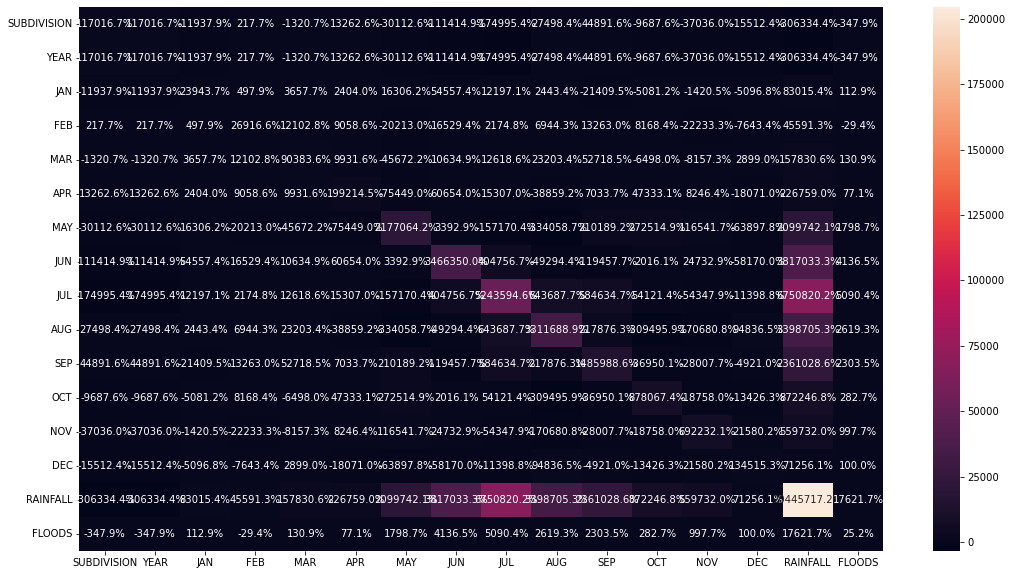

In [270]:
plt.figure(figsize=(18,10))
sns.heatmap(data.cov(),annot=True,fmt='.1%')

# SVM 

In [271]:
from sklearn.svm import SVC

In [272]:
classifier = SVC(kernel='rbf',random_state=None)
classifier.fit(x_train, y_train)

SVC()

In [273]:
classifier.intercept_

array([0.33695307])

In [274]:
classifier.n_support_

array([39, 39])

In [275]:
classifier.support_vectors_

array([[1.914e+03, 7.000e-01, 6.800e+00, ..., 3.744e+02, 1.009e+02,
        1.352e+02],
       [1.964e+03, 1.100e+00, 7.800e+00, ..., 3.257e+02, 1.917e+02,
        1.780e+01],
       [1.972e+03, 2.600e+00, 7.500e+00, ..., 3.515e+02, 1.405e+02,
        1.143e+02],
       ...,
       [2.006e+03, 8.100e+00, 5.000e-01, ..., 3.764e+02, 1.628e+02,
        1.800e+00],
       [1.971e+03, 3.160e+01, 1.850e+01, ..., 2.209e+02, 3.830e+01,
        6.230e+01],
       [1.948e+03, 4.300e+01, 8.300e+00, ..., 1.839e+02, 2.156e+02,
        1.920e+01]])

In [276]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [277]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

[[36  6]
 [ 1 51]]
[[12  4]
 [ 0  8]]


# Accuracy Finding

In [278]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(accuracy_train)

0.925531914893617


In [279]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_test)

0.8333333333333334


In [280]:
c = data.corr()
print(c)

             SUBDIVISION      YEAR       JAN       FEB       MAR       APR  \
SUBDIVISION     1.000000  1.000000 -0.225531  0.003879 -0.012842  0.086865   
YEAR            1.000000  1.000000 -0.225531  0.003879 -0.012842  0.086865   
JAN            -0.225531 -0.225531  1.000000  0.019613  0.078626  0.034807   
FEB             0.003879  0.003879  0.019613  1.000000  0.245375  0.123706   
MAR            -0.012842 -0.012842  0.078626  0.245375  1.000000  0.074014   
APR             0.086865  0.086865  0.034807  0.123706  0.074014  1.000000   
MAY            -0.059661 -0.059661  0.071420 -0.083500 -0.102961 -0.114566   
JUN            -0.174938 -0.174938  0.189375  0.054114  0.019000  0.072990   
JUL            -0.223403 -0.223403  0.034423  0.005789  0.018330  0.014977   
AUG             0.044173  0.044173  0.008677  0.023259  0.042411 -0.047842   
SEP             0.107655  0.107655 -0.113502  0.066317  0.143850  0.012928   
OCT            -0.030223 -0.030223 -0.035044  0.053133 -0.023066

# Correlation using Different Colours

<AxesSubplot:>

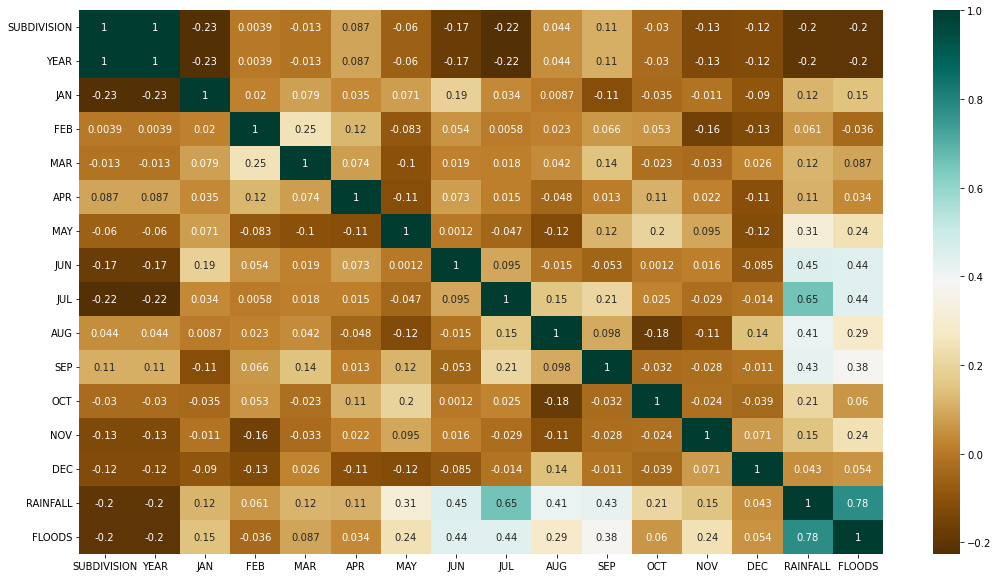

In [281]:
plt.figure(figsize=(18,10))
sns.heatmap(c,cmap='BrBG',annot=True)

In [282]:
data.cov()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,RAINFALL,FLOODS
SUBDIVISION,1170.166667,1170.166667,-119.378632,2.176923,-13.207265,132.625641,-301.126068,-1114.149145,-1749.953846,274.983761,448.915812,-96.876496,-370.360256,-155.123504,-3063.344444,-3.478632
YEAR,1170.166667,1170.166667,-119.378632,2.176923,-13.207265,132.625641,-301.126068,-1114.149145,-1749.953846,274.983761,448.915812,-96.876496,-370.360256,-155.123504,-3063.344444,-3.478632
JAN,-119.378632,-119.378632,239.437427,4.979192,36.577053,24.039512,163.062403,545.574281,121.970900,24.434163,-214.094844,-50.812451,-14.205421,-50.968209,830.154092,1.128900
FEB,2.176923,2.176923,4.979192,269.166362,121.027766,90.585966,-202.129655,165.293580,21.748364,69.442838,132.629654,81.684355,-222.332684,-76.434079,455.913330,-0.294307
MAR,-13.207265,-13.207265,36.577053,121.027766,903.835779,99.315784,-456.721990,106.348567,126.186249,232.033874,527.184758,-64.980285,-81.573089,28.990108,1578.305793,1.309228
APR,132.625641,132.625641,24.039512,90.585966,99.315784,1992.145044,-754.490185,606.540393,153.070058,-388.591540,70.336859,473.330962,82.464276,-180.710372,2267.590185,0.770679
MAY,-301.126068,-301.126068,163.062403,-202.129655,-456.721990,-754.490185,21770.641812,33.929279,-1571.703571,-3340.586652,2101.892304,2725.149056,1165.417193,-638.978371,20997.420795,17.987223
JUN,-1114.149145,-1114.149145,545.574281,165.293580,106.348567,606.540393,33.929279,34663.499937,4047.567071,-492.944239,-1194.576633,20.161145,247.329460,-581.699654,38170.332986,41.365233
JUL,-1749.953846,-1749.953846,121.970900,21.748364,126.186249,153.070058,-1571.703571,4047.567071,52435.946420,6436.876865,5846.347194,541.214459,-543.479371,-113.988396,67508.201520,50.904100
AUG,274.983761,274.983761,24.434163,69.442838,232.033874,-388.591540,-3340.586652,-492.944239,6436.876865,33116.888805,2178.762799,-3094.959423,-1706.808293,948.365073,33987.052721,26.193423


# Covarience using Different colours

<AxesSubplot:>

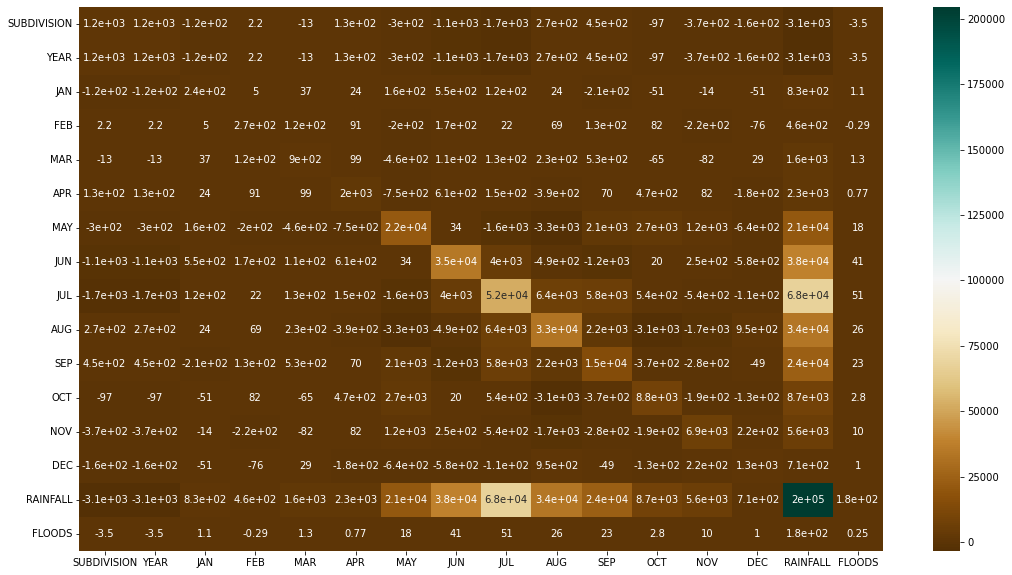

In [283]:
plt.figure(figsize=(18,10))
sns.heatmap(data.cov(),cmap='BrBG',annot=True)

# SVM

In [284]:
from sklearn import svm
model=svm.SVC()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
prediction

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [285]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,prediction)
accuracy*100

83.33333333333334

In [286]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,RAINFALL,FLOODS
0,0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [287]:
classes={0:'NO',1:'YES'}
RAINFALL=float(input("Enter RAINFALL Percentage : "))
user_input=[[16, 15, 6, 4, 6, 7, 7, 9, 10, 11, 35, 13,16]]
pred=model.predict(user_input)
print(classes[pred[0]]) 

Enter RAINFALL Percentage : 700
NO


# LOGISTICS REGRESSION

In [289]:
dataset=data.dropna(axis=0)

In [290]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [291]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [292]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=metrics.accuracy_score(pred,y_test)
acc*100

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


91.66666666666666

# RANDOM FOREST

In [293]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred1=rfc.predict(x_test)
acc1=metrics.accuracy_score(y_test,pred)
acc1*100

91.66666666666666

In [294]:
c_f=metrics.classification_report(y_test,pred1)
print(c_f)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [295]:
c_m=metrics.confusion_matrix(y_test,pred)
c_m

array([[6, 1],
       [0, 5]], dtype=int64)

In [296]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [297]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [298]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [299]:
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
pred


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0], dtype=int64)

In [300]:
y_test

9      0
64     0
108    0
46     1
35     1
7      0
104    1
61     1
0      1
55     0
57     1
52     0
4      0
90     1
74     1
30     1
24     1
82     0
41     1
73     0
77     1
19     1
37     0
75     0
Name: FLOODS, dtype: int64

In [301]:
from __future__ import print_function

import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [302]:
c_r=metrics.classification_report(y_test,pred)
print(c_r)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.92      0.92        13

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24

